# Summary of Miami

Some basic summary plots of a lap around Miami...

In [1]:
# Load libraries
import fastf1 as ff1
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

# Define session
year = 2024
race = 'Miami'
ses = 'Q'

# Define color palette
colormap = mpl.cm.plasma

# Load and confirm session information
session = ff1.get_session(year, race, ses)
session

req         WARNING 	DEFAULT CACHE ENABLED! (4.65 GB) /Users/mjbernha/Library/Caches/fastf1


2024 Season Round 6: Miami Grand Prix - Qualifying

In [2]:
# Load extended session information, and pole setting lap
session.load()

# Verstappen had pole in 2024
lap = session.laps.pick_drivers('VER').pick_fastest()

core           INFO 	Loading data for Miami Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '11', '4', '81', '63', '44', '27', '22', '18', '10', '31', '23', '14', '77', '2', '3', '20', '24']


## Track map

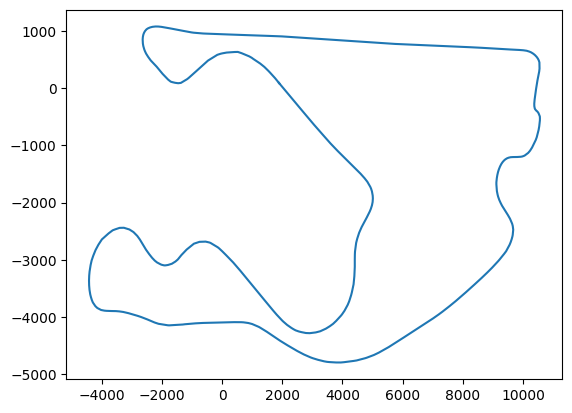

In [4]:
# TODO: Prettier plot
# TODO: Constrain aspect ratio
plt.plot(
  lap.telemetry['X'],
  lap.telemetry['Y']
)

## Speed analysis

In [5]:
# Isolate lap speed measurements
speed = lap.telemetry['Speed']

# speed is a pandas Series, which can be 
speed.describe()

count    670.000000
mean     220.202662
std       83.925208
min       68.000000
25%      136.187501
50%      240.507919
75%      295.000000
max      338.000000
Name: Speed, dtype: float64

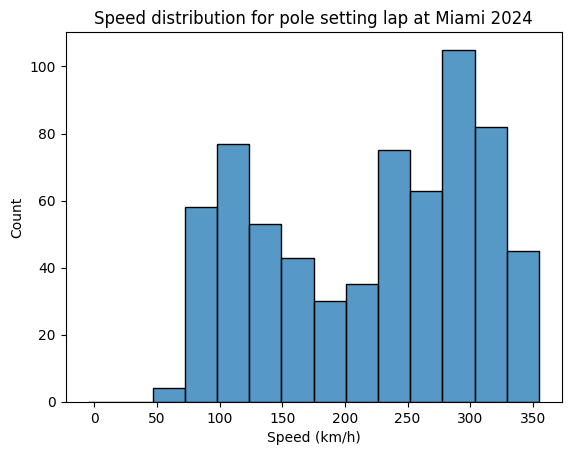

In [7]:
sns.histplot(
  speed,
  binrange=(-5,355)
)
plt.xlabel('Speed (km/h)')
plt.ylabel('Count')
plt.title('Speed distribution for pole setting lap at Miami 2024')
plt.show()

## Throttle analysis

In [8]:
throttle = lap.telemetry['Throttle']

throttle.describe()

count    670.000000
mean      70.008268
std       41.455400
min        0.000000
25%       31.153047
50%      100.000000
75%      100.000000
max      100.000000
Name: Throttle, dtype: float64

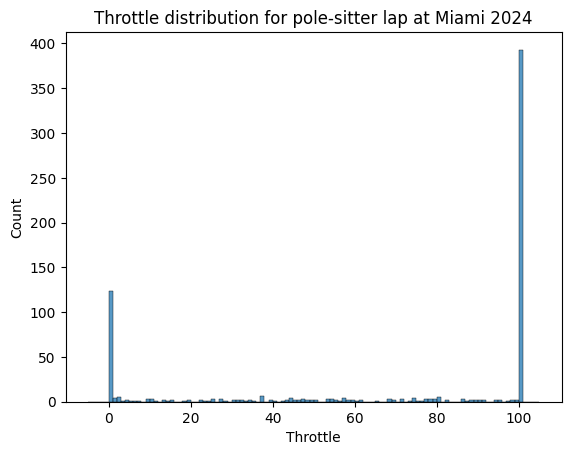

In [10]:
sns.histplot(
  throttle,
  binrange=(-5,105),
  bins=110
)
plt.title('Throttle distribution for pole-sitter lap at Miami 2024')
plt.show()

## Gear utilization

Text(0.5, 1.0, 'Gear utilization across pole setting lap')

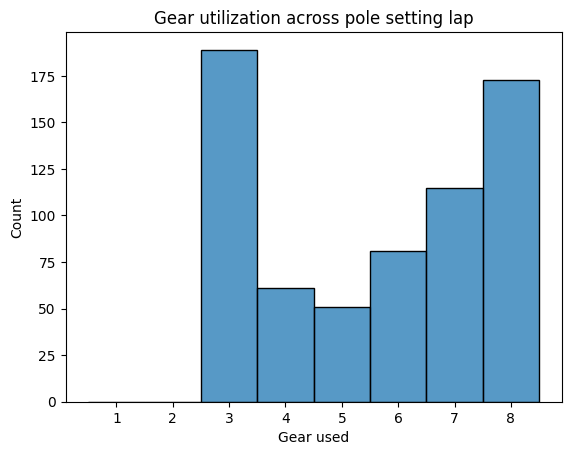

In [11]:
gear = lap.telemetry['nGear']

sns.histplot(
  gear,
  binrange=(1,8),
  discrete=True
)
plt.xlabel('Gear used')
plt.title('Gear utilization across pole setting lap')

In [12]:
lap.telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2024-05-04 20:50:55.554,0 days 01:03:57.542000,,1031.396389,0 days 00:00:00,11617.018694,293.568749,7,100.0,False,12,interpolation,0.225509,0.000042,OnTrack,1896.211766,90.915297,249.290179
3,2024-05-04 20:50:55.600,0 days 01:03:57.588000,,1031.396389,0 days 00:00:00.046000,11637.000000,294.000000,7,100.0,False,12,car,3.985000,0.000745,OnTrack,1927.484268,70.974561,249.584158
4,2024-05-04 20:50:55.673,0 days 01:03:57.661000,,1031.396389,0 days 00:00:00.119000,11371.655764,294.302904,7,100.0,False,12,pos,9.953233,0.001861,OnTrack,1978.000000,39.000000,250.000000
5,2024-05-04 20:50:55.841,0 days 01:03:57.829000,11,1031.396389,0 days 00:00:00.287000,10761.000000,295.000000,7,100.0,False,12,car,23.733611,0.004439,OnTrack,2098.136086,-35.992083,250.719388
6,2024-05-04 20:50:55.972,0 days 01:03:57.960000,11,1031.323611,0 days 00:00:00.418000,10739.384989,296.637501,7,100.0,False,12,pos,34.580702,0.006467,OnTrack,2186.000000,-91.000000,251.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2024-05-04 20:52:22.241,0 days 01:05:24.229000,11,793.810000,0 days 00:01:26.687000,11252.000000,283.000000,7,100.0,False,12,car,5298.594722,0.990967,OnTrack,1544.794383,302.228366,248.600169
668,2024-05-04 20:52:22.312,0 days 01:05:24.300000,11,792.784444,0 days 00:01:26.758000,11291.641702,284.183334,7,100.0,False,12,pos,5304.237041,0.992022,OnTrack,1594.000000,275.000000,249.000000
669,2024-05-04 20:52:22.592,0 days 01:05:24.580000,11,788.739999,0 days 00:01:27.038000,11447.975036,288.850001,7,100.0,False,12,pos,5326.768134,0.996236,OnTrack,1758.000000,180.000000,249.000000
670,2024-05-04 20:52:22.601,0 days 01:05:24.589000,11,788.610000,0 days 00:01:27.047000,11453.000000,289.000000,7,100.0,False,12,car,5327.494722,0.996372,OnTrack,1763.556066,176.560253,249.013376


## Lap telemetry

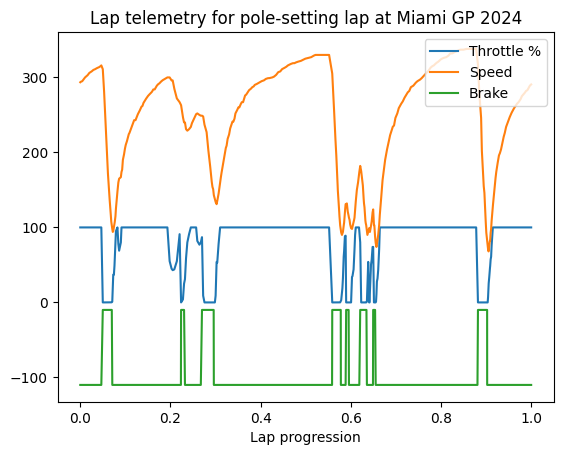

In [13]:
plt.plot(
  lap.telemetry['RelativeDistance'],
  lap.telemetry['Throttle'],
)
plt.plot(
  lap.telemetry['RelativeDistance'],
  lap.telemetry['Speed']
)
plt.plot(
  lap.telemetry['RelativeDistance'],
  (lap.telemetry['Brake'] * 100) - 110
)
plt.title('Lap telemetry for pole-setting lap at Miami GP 2024')
plt.xlabel('Lap progression')
plt.legend(['Throttle %', 'Speed', 'Brake'])
plt.show()

---

This is the end of the notebook.